# File system and operating system

In [223]:
from pathlib import Path
import os.path
from datetime import datetime, timedelta
from zipfile import ZipFile
from PIL import Image
import pandas as pd
import csv
import json
from sqlalchemy import create_engine

## File system

In [3]:
current_dir = Path('.')
current_dir

WindowsPath('.')

In [5]:
absolute_path = current_dir.absolute()
absolute_path

WindowsPath('C:/Users/Aelion/Documents/PythonPoo/FileOs')

In [6]:
print(absolute_path)

C:\Users\Aelion\Documents\PythonPoo\FileOs


In [8]:
training_dir = Path('C:\\Users\\Aelion\\Documents\\PythonPoo')
training_dir

WindowsPath('C:/Users/Aelion/Documents/PythonPoo')

In [9]:
training_dir = Path('C:/Users/Aelion/Documents/PythonPoo')
training_dir

WindowsPath('C:/Users/Aelion/Documents/PythonPoo')

In [11]:
# iterdir returns a generator (lazy object)
list(current_dir.iterdir())

[WindowsPath('.ipynb_checkpoints'),
 WindowsPath('files.ipynb'),
 WindowsPath('Photos.7z'),
 WindowsPath('Photos.zip')]

In [26]:
for file in current_dir.iterdir():
    print(file)
    print(file.absolute())
    print(file.name)
    print(
        'directory:', file.is_dir(),
        '; file:', file.is_file()
    )
    if file.is_file():
        metadata = file.stat()
        modified_date = datetime.fromtimestamp(metadata.st_mtime)
        print("last modified:", modified_date)
        print("size:", metadata.st_size)
        # alt. using os.path
        modified_date2 = os.path.getmtime(file) # accept path object
        modified_date3 = os.path.getmtime(str(file)) # accept text path 
        print(modified_date2, modified_date3)
    print()

.ipynb_checkpoints
C:\Users\Aelion\Documents\PythonPoo\FileOs\.ipynb_checkpoints
.ipynb_checkpoints
directory: True ; file: False

files.ipynb
C:\Users\Aelion\Documents\PythonPoo\FileOs\files.ipynb
files.ipynb
directory: False ; file: True
last modified: 2024-06-14 10:16:46.898154
size: 6383
1718353006.8981535 1718353006.8981535

Photos.7z
C:\Users\Aelion\Documents\PythonPoo\FileOs\Photos.7z
Photos.7z
directory: False ; file: True
last modified: 2024-06-14 09:17:11.814491
size: 1423278
1718349431.8144908 1718349431.8144908

Photos.zip
C:\Users\Aelion\Documents\PythonPoo\FileOs\Photos.zip
Photos.zip
directory: False ; file: True
last modified: 2024-06-14 09:18:46.651875
size: 1734885
1718349526.6518745 1718349526.6518745



In [19]:
1718351706 / 3600 / 24 / 365

54.488575152207005

In [22]:
datetime.now() - timedelta(seconds=1718351706)

datetime.datetime(1970, 1, 1, 2, 9, 0, 576529)

## extract archive

In [28]:
archive_path = Path('Photos.zip')
archive_path.exists() and archive_path.is_file()

True

NB: logical operator: or and not

In [32]:
with ZipFile(archive_path) as archive:
    archive.extractall()
# auto: archive.close()

## Explore tree + filter

In [88]:
photo_dir = Path('Photos/')
photo_dir.exists and photo_dir.is_dir()

True

In [89]:
for photo_path in photo_dir.glob('**/*.jpg'):
    print(photo_path)

Photos\IMG_20201024_155325.jpg
Photos\Set1\IMG_20200711_110837.jpg
Photos\Set1\IMG_20200711_120450.jpg
Photos\Set1\IMG_20200731_112734.jpg
Photos\Set1\IMG_20200731_124909.jpg
Photos\Set1\IMG_20200731_124939.jpg
Photos\Set1\IMG_20200731_134742.jpg
Photos\Set1\IMG_20200809_101205.jpg
Photos\Set1\IMG_20200809_111130.jpg
Photos\Set1\IMG_20200809_124231.jpg
Photos\Set1\IMG_20200809_125816.jpg
Photos\Set1\IMG_20200821_104500.jpg
Photos\Set1\IMG_20200905_113751.jpg
Photos\Set1\IMG_20200913_192604.jpg
Photos\Set1\IMG_20200927_122751.jpg
Photos\Set1\IMG_20200927_131116.jpg
Photos\Set1\IMG_20200927_152228.jpg
Photos\Set1\IMG_20201024_155325.jpg
Photos\Set1\other\IMG_20200711_090914.jpg
Photos\Set2\IMG_20200821_104500.jpg
Photos\Set2\IMG_20200821_112947.jpg
Photos\Set2\IMG_20200823_120734.jpg
Photos\Set2\IMG_20200823_123302.jpg
Photos\Set2\IMG_20200823_125206.jpg
Photos\Set2\IMG_20200905_113751.jpg
Photos\Set2\IMG_20200905_114619.jpg
Photos\Set2\IMG_20200905_124848.jpg
Photos\Set2\IMG_20200905_12

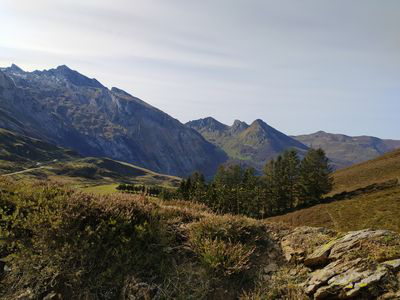

In [90]:
# work on last image
img = Image.open(photo_path)
img

In [91]:
print(img.size, img.getexif())

(400, 300) {34853: 847, 296: 2, 34665: 264, 271: 'Xiaomi', 272: 'Redmi Note 8T', 305: 'willow-user 9 PKQ1.190616.001 V11.0.7.0.PCXEUXM release-keys', 274: 1, 306: '2020:10:24 15:12:54', 531: 1, 282: 72.0, 283: 72.0}


In [92]:
img.close()

In [93]:
print(photo_path.name)
tag_date =photo_path.name[4:12]
year = tag_date[:4]
month = tag_date[4:6]
day = tag_date[6:]
year, month, day

IMG_20201024_151252.jpg


('2020', '10', '24')

In [94]:
photo_dest_dir = Path('Photos_Archives') / year / month / day
photo_dest_dir.exists()

True

In [95]:
photo_dest_dir.mkdir(exist_ok=True, parents=True)

In [96]:
photo_dest = photo_dest_dir / photo_path.name
photo_dest

WindowsPath('Photos_Archives/2020/10/24/IMG_20201024_151252.jpg')

In [97]:
# move
photo_path.rename(photo_dest)

WindowsPath('Photos_Archives/2020/10/24/IMG_20201024_151252.jpg')

NB: see also: os.path, shutil
move, delete, copy, ...

## CSV Files
data files from:
- https://data.toulouse-metropole.fr/explore/dataset/02-station-meteo-toulouse-marengo/information/
- https://www.data.gouv.fr/fr/datasets/villes-de-france/

### Encoding
- 1 character = 1 byte (fr: octet)
    - ASCII: 128 caractères A-Z a-z 0-0 + special characters
    - latin 1 = ISO-8859-1 (256)
    - ISO-8859-15 (256) + €, œ, Œ, Ÿ
    - cp1252/ANSI (256) + €, œ, Œ, Ÿ
- 1 character = 1+ byte(s)
    - UNICODE: ~150000
        - UTF-8
        - UTF-16
        - UTF-32

In [100]:
2**7, 2**8

(128, 256)

In [103]:
"cœur".upper(), "ÿ".upper()

('CŒUR', 'Ÿ')

In [104]:
city = "L'Haÿ-les-Roses"
city.upper()

"L'HAŸ-LES-ROSES"

### Basic Reading

In [107]:
# open in mode r=read and t=text
f = open('data/cities.csv', encoding='UTF-8')
f

<_io.TextIOWrapper name='data/cities.csv' mode='r' encoding='UTF-8'>

In [108]:
lines = list(f)
f.close()

In [109]:
lines[:3]

['insee_code,city_code,zip_code,label,latitude,longitude,department_name,department_number,region_name,region_geojson_name\n',
 '25620,ville du pont,25650,ville du pont,46.999873398,6.498147193,doubs,25,bourgogne-franche-comté,Bourgogne-Franche-Comté\n',
 '25624,villers grelot,25640,villers grelot,47.361512085,6.235167025,doubs,25,bourgogne-franche-comté,Bourgogne-Franche-Comté\n']

### CSV Reader
module csv
- reader/writer: list of list
- DictReader/DictWriter: list pf dict

In [118]:
with open('data/cities.csv', encoding="UTF-8", newline='') as f:
    reader = csv.reader(f, delimiter=',')
    headers = next(reader)
    data = list(reader)
print(headers)
data[:4]

['insee_code', 'city_code', 'zip_code', 'label', 'latitude', 'longitude', 'department_name', 'department_number', 'region_name', 'region_geojson_name']


[['25620',
  'ville du pont',
  '25650',
  'ville du pont',
  '46.999873398',
  '6.498147193',
  'doubs',
  '25',
  'bourgogne-franche-comté',
  'Bourgogne-Franche-Comté'],
 ['25624',
  'villers grelot',
  '25640',
  'villers grelot',
  '47.361512085',
  '6.235167025',
  'doubs',
  '25',
  'bourgogne-franche-comté',
  'Bourgogne-Franche-Comté'],
 ['25615',
  'villars les blamont',
  '25310',
  'villars les blamont',
  '47.368383721',
  '6.871414913',
  'doubs',
  '25',
  'bourgogne-franche-comté',
  'Bourgogne-Franche-Comté'],
 ['25619',
  'les villedieu',
  '25240',
  'les villedieu',
  '46.713906258',
  '6.26583065',
  'doubs',
  '25',
  'bourgogne-franche-comté',
  'Bourgogne-Franche-Comté']]

In [119]:
len(data)

39145

### Pandas

#### Cities

In [121]:
df1 = pd.DataFrame(data, columns=headers)
df1

,insee_code,city_code,zip_code,label,latitude,longitude,department_name,department_number,region_name,region_geojson_name
0,25620,ville du pont,25650,ville du pont,46.999873398,6.498147193,doubs,25,bourgogne-franche-comté,Bourgogne-Franche-Comté
1,25624,villers grelot,25640,villers grelot,47.361512085,6.235167025,doubs,25,bourgogne-franche-comté,Bourgogne-Franche-Comté
2,25615,villars les blamont,25310,villars les blamont,47.368383721,6.871414913,doubs,25,bourgogne-franche-comté,Bourgogne-Franche-Comté
3,25619,les villedieu,25240,les villedieu,46.713906258,6.26583065,doubs,25,bourgogne-franche-comté,Bourgogne-Franche-Comté
4,25622,villers buzon,25170,villers buzon,47.228558434,5.852186748,doubs,25,bourgogne-franche-comté,Bourgogne-Franche-Comté
...,...,...,...,...,...,...,...,...,...,...
39140,98829,thio,98829,thio,,,nouvelle-calédonie,988,nouvelle-calédonie,Nouvelle Calédonie
39141,98831,voh,98833,voh,,,nouvelle-calédonie,988,nouvelle-calédonie,Nouvelle Calédonie
39142,98832,yate,98834,yate,,,nouvelle-calédonie,988,nouvelle-calédonie,Nouvelle Calédonie
39143,98612,sigave,98620,sigave,-14.270411199,-178.155263035,wallis-et-futuna,986,wallis-et-futuna,Wallis-et-Futuna


In [134]:
df_cities = pd.read_csv('data/cities.csv', sep=',', encoding='UTF-8', dtype={'zip_code':'str'})
df_cities.head(3)

,insee_code,city_code,zip_code,label,latitude,longitude,department_name,department_number,region_name,region_geojson_name
0,25620,ville du pont,25650,ville du pont,46.999873,6.498147,doubs,25,bourgogne-franche-comté,Bourgogne-Franche-Comté
1,25624,villers grelot,25640,villers grelot,47.361512,6.235167,doubs,25,bourgogne-franche-comté,Bourgogne-Franche-Comté
2,25615,villars les blamont,25310,villars les blamont,47.368384,6.871415,doubs,25,bourgogne-franche-comté,Bourgogne-Franche-Comté


In [135]:
type(df_cities)

pandas.core.frame.DataFrame

In [136]:
df_cities.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39145 entries, 0 to 39144
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   insee_code           39145 non-null  object 
 1   city_code            39145 non-null  object 
 2   zip_code             39145 non-null  object 
 3   label                39145 non-null  object 
 4   latitude             38934 non-null  float64
 5   longitude            38934 non-null  float64
 6   department_name      39145 non-null  object 
 7   department_number    39145 non-null  object 
 8   region_name          39145 non-null  object 
 9   region_geojson_name  39145 non-null  object 
dtypes: float64(2), object(8)
memory usage: 3.0+ MB


In [138]:
# print(sorted(df_cities.zip_code.unique()))

In [140]:
# type Series: column or row
df_cities.label

0              ville du pont
1             villers grelot
2        villars les blamont
3              les villedieu
4              villers buzon
                ...         
39140                   thio
39141                    voh
39142                   yate
39143                 sigave
39144                   uvea
Name: label, Length: 39145, dtype: object

In [141]:
df_cities['label']

0              ville du pont
1             villers grelot
2        villars les blamont
3              les villedieu
4              villers buzon
                ...         
39140                   thio
39141                    voh
39142                   yate
39143                 sigave
39144                   uvea
Name: label, Length: 39145, dtype: object

In [143]:
# 2+ columns
df_cities[['label','zip_code']]

,label,zip_code
0,ville du pont,25650
1,villers grelot,25640
2,villars les blamont,25310
3,les villedieu,25240
4,villers buzon,25170
...,...,...
39140,thio,98829
39141,voh,98833
39142,yate,98834
39143,sigave,98620


In [147]:
df_cities.sort_values(['department_number','label'], inplace=True)
df_cities

,insee_code,city_code,zip_code,label,latitude,longitude,department_name,department_number,region_name,region_geojson_name
5528,01004,amberieu en bugey,01500,amberieu en bugey,45.961049,5.372275,ain,01,auvergne-rhône-alpes,Auvergne-Rhône-Alpes
20381,01005,amberieux en dombes,01330,amberieux en dombes,45.996164,4.911967,ain,01,auvergne-rhône-alpes,Auvergne-Rhône-Alpes
20382,01006,ambleon,01300,ambleon,45.749886,5.594585,ain,01,auvergne-rhône-alpes,Auvergne-Rhône-Alpes
4640,01007,ambronay,01500,ambronay,46.005691,5.357749,ain,01,auvergne-rhône-alpes,Auvergne-Rhône-Alpes
4605,01008,ambutrix,01500,ambutrix,45.936683,5.332447,ain,01,auvergne-rhône-alpes,Auvergne-Rhône-Alpes
...,...,...,...,...,...,...,...,...,...,...
39123,98830,touho,98831,touho,NaN,NaN,nouvelle-calédonie,988,nouvelle-calédonie,Nouvelle Calédonie
39118,98809,l ile des pins,98832,vao,NaN,NaN,nouvelle-calédonie,988,nouvelle-calédonie,Nouvelle Calédonie
39141,98831,voh,98833,voh,NaN,NaN,nouvelle-calédonie,988,nouvelle-calédonie,Nouvelle Calédonie
39107,98814,lifou,98820,we,NaN,NaN,nouvelle-calédonie,988,nouvelle-calédonie,Nouvelle Calédonie


In [151]:
df_st_sauveur = df_cities[df_cities.label == 'st sauveur']
df_st_sauveur

,insee_code,city_code,zip_code,label,latitude,longitude,department_name,department_number,region_name,region_geojson_name
26844,05156,st sauveur,05200,st sauveur,44.537103,6.529371,hautes-alpes,05,provence-alpes-côte d'azur,Provence-Alpes-Côte d'Azur
1794,21571,st sauveur,21270,st sauveur,47.358454,5.406230,côte-d'or,21,bourgogne-franche-comté,Bourgogne-Franche-Comté
16673,24499,st sauveur,24520,st sauveur,44.873571,0.583395,dordogne,24,nouvelle-aquitaine,Nouvelle-Aquitaine
13915,29262,st sauveur,29400,st sauveur,48.448266,-4.000249,finistère,29,bretagne,Bretagne
21427,31516,st sauveur,31790,st sauveur,43.750997,1.396069,haute-garonne,31,occitanie,Occitanie
18464,33471,st sauveur,33250,st sauveur,45.194731,-0.818146,gironde,33,nouvelle-aquitaine,Nouvelle-Aquitaine
6843,38454,st sauveur,38160,st sauveur,45.145392,5.344213,isère,38,auvergne-rhône-alpes,Auvergne-Rhône-Alpes
29545,54488,st sauveur,54480,st sauveur,48.523020,7.002695,meurthe-et-moselle,54,grand est,Grand Est
33773,60597,st sauveur,60320,st sauveur,49.328743,2.804960,oise,60,hauts-de-france,Hauts-de-France
3484,70473,st sauveur,70300,st sauveur,47.795438,6.394931,haute-saône,70,bourgogne-franche-comté,Bourgogne-Franche-Comté


In [152]:
len(df_st_sauveur)

11

In [156]:
dep = '64'
df_cities_dep = df_cities[df_cities.department_number == dep]
df_cities_dep

,insee_code,city_code,zip_code,label,latitude,longitude,department_name,department_number,region_name,region_geojson_name
16344,64001,aast,64460,aast,43.291176,-0.081741,pyrénées-atlantiques,64,nouvelle-aquitaine,Nouvelle-Aquitaine
17930,64002,abere,64160,abere,43.387077,-0.175023,pyrénées-atlantiques,64,nouvelle-aquitaine,Nouvelle-Aquitaine
16347,64003,abidos,64150,abidos,43.395117,-0.627969,pyrénées-atlantiques,64,nouvelle-aquitaine,Nouvelle-Aquitaine
17573,64004,abitain,64390,abitain,43.417347,-0.997954,pyrénées-atlantiques,64,nouvelle-aquitaine,Nouvelle-Aquitaine
17586,64005,abos,64360,abos,43.353789,-0.550999,pyrénées-atlantiques,64,nouvelle-aquitaine,Nouvelle-Aquitaine
...,...,...,...,...,...,...,...,...,...,...
16661,64556,viellesegure,64150,viellesegure,43.355691,-0.702670,pyrénées-atlantiques,64,nouvelle-aquitaine,Nouvelle-Aquitaine
17904,64557,vignes,64410,vignes,43.523642,-0.410014,pyrénées-atlantiques,64,nouvelle-aquitaine,Nouvelle-Aquitaine
18785,64558,villefranque,64990,villefranque,43.441684,-1.447768,pyrénées-atlantiques,64,nouvelle-aquitaine,Nouvelle-Aquitaine
18788,64559,viodos abense de bas,64130,viodos abense de bas,43.247703,-0.896421,pyrénées-atlantiques,64,nouvelle-aquitaine,Nouvelle-Aquitaine


In [163]:
long_max = -3.0
df_cities_west = df_cities[df_cities.longitude <= long_max]
df_cities_west

,insee_code,city_code,zip_code,label,latitude,longitude,department_name,department_number,region_name,region_geojson_name
14276,22004,begard,22140,begard,48.634783,-3.291535,côtes-d'armor,22,bretagne,Bretagne
14277,22004,begard,22140,begard,48.634783,-3.291535,côtes-d'armor,22,bretagne,Bretagne
14624,22004,begard,22140,begard,48.634783,-3.291535,côtes-d'armor,22,bretagne,Bretagne
14924,22004,begard,22140,begard,48.634783,-3.291535,côtes-d'armor,22,bretagne,Bretagne
14539,22005,belle isle en terre,22810,belle isle en terre,48.531065,-3.381837,côtes-d'armor,22,bretagne,Bretagne
...,...,...,...,...,...,...,...,...,...,...
38906,97502,st pierre,97500,st pierre et miquelon,46.779881,-56.189609,saint-pierre-et-miquelon,975,saint-pierre-et-miquelon,Saint-Pierre-et-Miquelon
38907,97501,miquelon langlade,97500,st pierre et miquelon,46.951612,-56.324420,saint-pierre-et-miquelon,975,saint-pierre-et-miquelon,Saint-Pierre-et-Miquelon
39143,98612,sigave,98620,sigave,-14.270411,-178.155263,wallis-et-futuna,986,wallis-et-futuna,Wallis-et-Futuna
39144,98613,uvea,98600,uvea,-13.281863,-176.161928,wallis-et-futuna,986,wallis-et-futuna,Wallis-et-Futuna


In [173]:
long_min = -5.0
long_max = -3.0
df_cities_span = df_cities[df_cities.longitude.between(long_min, long_max)]
df_cities_span

,insee_code,city_code,zip_code,label,latitude,longitude,department_name,department_number,region_name,region_geojson_name
14276,22004,begard,22140,begard,48.634783,-3.291535,côtes-d'armor,22,bretagne,Bretagne
14277,22004,begard,22140,begard,48.634783,-3.291535,côtes-d'armor,22,bretagne,Bretagne
14624,22004,begard,22140,begard,48.634783,-3.291535,côtes-d'armor,22,bretagne,Bretagne
14924,22004,begard,22140,begard,48.634783,-3.291535,côtes-d'armor,22,bretagne,Bretagne
14539,22005,belle isle en terre,22810,belle isle en terre,48.531065,-3.381837,côtes-d'armor,22,bretagne,Bretagne
...,...,...,...,...,...,...,...,...,...,...
14475,56233,st philibert,56470,st philibert,47.587870,-3.000798,morbihan,56,bretagne,Bretagne
14460,56234,st pierre quiberon,56510,st pierre quiberon,47.522672,-3.138504,morbihan,56,bretagne,Bretagne
14462,56238,st tugdual,56540,st tugdual,48.096137,-3.366971,morbihan,56,bretagne,Bretagne
14471,56209,ste brigitte,56480,ste brigitte,48.177042,-3.110408,morbihan,56,bretagne,Bretagne


combine predicates with 'element wise' operators (overrides bitwise operators)
- & : and
- | : or
- ~ : not
- ^ : xor (exclusive or)

In [170]:
df_cities[(df_cities.label=='st sauveur') & (df_cities.region_name == 'bretagne')]

,insee_code,city_code,zip_code,label,latitude,longitude,department_name,department_number,region_name,region_geojson_name
13915,29262,st sauveur,29400,st sauveur,48.448266,-4.000249,finistère,29,bretagne,Bretagne


In [172]:
~0b00001010

-11

In [169]:
(df_cities.label=='st sauveur').any() and (df_cities.region_name == 'bretagne').any()

True

In [174]:
df_cities_no_gps = df_cities[df_cities.latitude.isna()]
df_cities_no_gps

,insee_code,city_code,zip_code,label,latitude,longitude,department_name,department_number,region_name,region_geojson_name
39042,98731,nuku hiva,98742,aakapa,NaN,NaN,polynésie-française,987,polynésie-française,Polynésie française
38970,98747,taiarapu est,98719,afaahiti,NaN,NaN,polynésie-française,987,polynésie-française,Polynésie française
38998,98729,moorea maiao,98728,afareaitu,NaN,NaN,polynésie-française,987,polynésie-française,Polynésie française
39067,98720,hao,98790,ahunui,NaN,NaN,polynésie-française,987,polynésie-française,Polynésie française
38941,98719,gambier,98755,akamaru,NaN,NaN,polynésie-française,987,polynésie-française,Polynésie française
...,...,...,...,...,...,...,...,...,...,...
39123,98830,touho,98831,touho,NaN,NaN,nouvelle-calédonie,988,nouvelle-calédonie,Nouvelle Calédonie
39118,98809,l ile des pins,98832,vao,NaN,NaN,nouvelle-calédonie,988,nouvelle-calédonie,Nouvelle Calédonie
39141,98831,voh,98833,voh,NaN,NaN,nouvelle-calédonie,988,nouvelle-calédonie,Nouvelle Calédonie
39107,98814,lifou,98820,we,NaN,NaN,nouvelle-calédonie,988,nouvelle-calédonie,Nouvelle Calédonie


In [176]:
df_cities_dep.label.str.upper()

16344                    AAST
17930                   ABERE
16347                  ABIDOS
17573                 ABITAIN
17586                    ABOS
                 ...         
16661            VIELLESEGURE
17904                  VIGNES
18785            VILLEFRANQUE
18788    VIODOS ABENSE DE BAS
18791                   VIVEN
Name: label, Length: 565, dtype: object

In [182]:
# predicate on str: startswith, endswith, contains, match, fullmatch (with regexp)
# https://regex101.com/
df_cities_dep[df_cities_dep.label.str.startswith('st ')]

,insee_code,city_code,zip_code,label,latitude,longitude,department_name,department_number,region_name,region_geojson_name
18122,64469,st abit,64800,st abit,43.203814,-0.300348,pyrénées-atlantiques,64,nouvelle-aquitaine,Nouvelle-Aquitaine
17887,64470,st armou,64160,st armou,43.408255,-0.307097,pyrénées-atlantiques,64,nouvelle-aquitaine,Nouvelle-Aquitaine
18754,64471,st boes,64300,st boes,43.529231,-0.806082,pyrénées-atlantiques,64,nouvelle-aquitaine,Nouvelle-Aquitaine
18755,64472,st castin,64160,st castin,43.374538,-0.309081,pyrénées-atlantiques,64,nouvelle-aquitaine,Nouvelle-Aquitaine
18124,64474,st dos,64270,st dos,43.473428,-1.024221,pyrénées-atlantiques,64,nouvelle-aquitaine,Nouvelle-Aquitaine
18756,64476,st esteben,64640,st esteben,43.329117,-1.216671,pyrénées-atlantiques,64,nouvelle-aquitaine,Nouvelle-Aquitaine
18757,64477,st etienne de baigorry,64430,st etienne de baigorry,43.179193,-1.351175,pyrénées-atlantiques,64,nouvelle-aquitaine,Nouvelle-Aquitaine
17888,64478,st faust,64110,st faust,43.270353,-0.448343,pyrénées-atlantiques,64,nouvelle-aquitaine,Nouvelle-Aquitaine
16628,64479,st girons en bearn,64300,st girons en bearn,43.550476,-0.824081,pyrénées-atlantiques,64,nouvelle-aquitaine,Nouvelle-Aquitaine
17827,64480,st gladie arrive munein,64390,st gladie arrive munein,43.372490,-0.923168,pyrénées-atlantiques,64,nouvelle-aquitaine,Nouvelle-Aquitaine


In [181]:
df_cities_dep[df_cities_dep.label.str.match(r'st.[a-c]')]

,insee_code,city_code,zip_code,label,latitude,longitude,department_name,department_number,region_name,region_geojson_name
18122,64469,st abit,64800,st abit,43.203814,-0.300348,pyrénées-atlantiques,64,nouvelle-aquitaine,Nouvelle-Aquitaine
17887,64470,st armou,64160,st armou,43.408255,-0.307097,pyrénées-atlantiques,64,nouvelle-aquitaine,Nouvelle-Aquitaine
18754,64471,st boes,64300,st boes,43.529231,-0.806082,pyrénées-atlantiques,64,nouvelle-aquitaine,Nouvelle-Aquitaine
18755,64472,st castin,64160,st castin,43.374538,-0.309081,pyrénées-atlantiques,64,nouvelle-aquitaine,Nouvelle-Aquitaine


In [185]:
df_cities.columns

Index(['insee_code', 'city_code', 'zip_code', 'label', 'latitude', 'longitude',
       'department_name', 'department_number', 'region_name',
       'region_geojson_name'],
      dtype='object')

In [188]:
df_cities2 = df_cities.reindex(['zip_code', 'label', 'city_code', 'insee_code', 'latitude', 'longitude',
       'department_name', 'department_number', 'region_name',
       'region_geojson_name'], axis='columns')
df_cities2

,zip_code,label,city_code,insee_code,latitude,longitude,department_name,department_number,region_name,region_geojson_name
5528,01500,amberieu en bugey,amberieu en bugey,01004,45.961049,5.372275,ain,01,auvergne-rhône-alpes,Auvergne-Rhône-Alpes
20381,01330,amberieux en dombes,amberieux en dombes,01005,45.996164,4.911967,ain,01,auvergne-rhône-alpes,Auvergne-Rhône-Alpes
20382,01300,ambleon,ambleon,01006,45.749886,5.594585,ain,01,auvergne-rhône-alpes,Auvergne-Rhône-Alpes
4640,01500,ambronay,ambronay,01007,46.005691,5.357749,ain,01,auvergne-rhône-alpes,Auvergne-Rhône-Alpes
4605,01500,ambutrix,ambutrix,01008,45.936683,5.332447,ain,01,auvergne-rhône-alpes,Auvergne-Rhône-Alpes
...,...,...,...,...,...,...,...,...,...,...
39123,98831,touho,touho,98830,NaN,NaN,nouvelle-calédonie,988,nouvelle-calédonie,Nouvelle Calédonie
39118,98832,vao,l ile des pins,98809,NaN,NaN,nouvelle-calédonie,988,nouvelle-calédonie,Nouvelle Calédonie
39141,98833,voh,voh,98831,NaN,NaN,nouvelle-calédonie,988,nouvelle-calédonie,Nouvelle Calédonie
39107,98820,we,lifou,98814,NaN,NaN,nouvelle-calédonie,988,nouvelle-calédonie,Nouvelle Calédonie


In [189]:
df_cities[['zip_code', 'label', 'city_code', 'insee_code']]

,zip_code,label,city_code,insee_code
5528,01500,amberieu en bugey,amberieu en bugey,01004
20381,01330,amberieux en dombes,amberieux en dombes,01005
20382,01300,ambleon,ambleon,01006
4640,01500,ambronay,ambronay,01007
4605,01500,ambutrix,ambutrix,01008
...,...,...,...,...
39123,98831,touho,touho,98830
39118,98832,vao,l ile des pins,98809
39141,98833,voh,voh,98831
39107,98820,we,lifou,98814


In [192]:
df_cities_dep.to_csv(f'data/cities_{dep}.csv', sep=",", encoding="UTF-8", index=False)

In [193]:
df_cities_dep.to_clipboard(index=False)

#### Meteo

In [ ]:
# read weather data from Toulouse

In [201]:
meteo = pd.read_csv('data/02-station-meteo-toulouse-marengo.csv', sep=';', parse_dates=['heure_de_paris', 'heure_utc'])
meteo.head(2)

,data,id,humidite,direction_du_vecteur_de_vent_max,pluie_intensite_max,pression,direction_du_vecteur_vent_moyen,type_de_station,pluie,direction_du_vecteur_de_rafale_de_vent_max,force_moyenne_du_vecteur_vent,force_rafale_max,temperature,heure_de_paris,heure_utc
0,0595304f92e000000c400000,2,92,0,0.0,99800,0,ISS,0.0,0.0,0,0,12.4,2022-12-21 01:15:00+01:00,2022-12-21 00:15:00+00:00
1,059530af8ee000000c400000,2,92,0,0.0,99800,0,ISS,0.0,0.0,0,0,12.3,2022-12-21 02:00:00+01:00,2022-12-21 01:00:00+00:00


In [202]:
meteo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87105 entries, 0 to 87104
Data columns (total 15 columns):
 #   Column                                      Non-Null Count  Dtype              
---  ------                                      --------------  -----              
 0   data                                        87105 non-null  object             
 1   id                                          87105 non-null  int64              
 2   humidite                                    87105 non-null  int64              
 3   direction_du_vecteur_de_vent_max            87105 non-null  int64              
 4   pluie_intensite_max                         87105 non-null  float64            
 5   pression                                    87105 non-null  int64              
 6   direction_du_vecteur_vent_moyen             87105 non-null  int64              
 7   type_de_station                             87105 non-null  object             
 8   pluie                               

In [203]:
meteo.heure_de_paris[0]

Timestamp('2022-12-21 01:15:00+0100', tz='UTC+01:00')

In [204]:
meteo2 = meteo.set_index('heure_utc').sort_index()
meteo2

,data,id,humidite,direction_du_vecteur_de_vent_max,pluie_intensite_max,pression,direction_du_vecteur_vent_moyen,type_de_station,pluie,direction_du_vecteur_de_rafale_de_vent_max,force_moyenne_du_vecteur_vent,force_rafale_max,temperature,heure_de_paris
heure_utc,,,,,,,,,,,,,,
2019-06-06 00:00:00+00:00,04c6002f8ac8000040121800,2,89,9,0.0,90000,0,ISS,0.0,202.5,2,6,12.2,2019-06-06 02:00:00+02:00
2019-06-06 00:15:00+00:00,04c6004f82c8000040122000,2,89,9,0.0,90000,0,ISS,0.0,202.5,2,8,12.0,2019-06-06 02:15:00+02:00
2019-06-06 00:30:00+00:00,04c6006f62d0000040122000,2,90,9,0.0,90000,0,ISS,0.0,202.5,2,8,11.8,2019-06-06 02:30:00+02:00
2019-06-06 00:45:00+00:00,04c6008f5ed0000000000000,2,90,0,0.0,90000,0,ISS,0.0,0.0,0,0,11.7,2019-06-06 02:45:00+02:00
2019-06-06 01:00:00+00:00,04c600af5ed0000040122000,2,90,9,0.0,90000,0,ISS,0.0,202.5,2,8,11.7,2019-06-06 03:00:00+02:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-06-14 08:30:00+00:00,04ce547165f000000bc00000,2,62,0,0.0,99400,0,ISS,0.0,0.0,0,0,19.9,2024-06-14 10:30:00+02:00
2024-06-14 08:45:00+00:00,04ce549199e000000bc00000,2,60,0,0.0,99400,0,ISS,0.0,0.0,0,0,20.6,2024-06-14 10:45:00+02:00
2024-06-14 09:00:00+00:00,04ce54b1c5e000000bc00000,2,60,0,0.0,99400,0,ISS,0.0,0.0,0,0,21.1,2024-06-14 11:00:00+02:00


In [205]:
meteo2.loc['2019-06-06 00:00:00+00:00']

data                                           04c6002f8ac8000040121800
id                                                                    2
humidite                                                             89
direction_du_vecteur_de_vent_max                                      9
pluie_intensite_max                                                 0.0
pression                                                          90000
direction_du_vecteur_vent_moyen                                       0
type_de_station                                                     ISS
pluie                                                               0.0
direction_du_vecteur_de_rafale_de_vent_max                        202.5
force_moyenne_du_vecteur_vent                                         2
force_rafale_max                                                      6
temperature                                                        12.2
heure_de_paris                                2019-06-06 02:00:0

In [206]:
meteo2.loc['2019-06']

,data,id,humidite,direction_du_vecteur_de_vent_max,pluie_intensite_max,pression,direction_du_vecteur_vent_moyen,type_de_station,pluie,direction_du_vecteur_de_rafale_de_vent_max,force_moyenne_du_vecteur_vent,force_rafale_max,temperature,heure_de_paris
heure_utc,,,,,,,,,,,,,,
2019-06-06 00:00:00+00:00,04c6002f8ac8000040121800,2,89,9,0.0,90000,0,ISS,0.0,202.5,2,6,12.2,2019-06-06 02:00:00+02:00
2019-06-06 00:15:00+00:00,04c6004f82c8000040122000,2,89,9,0.0,90000,0,ISS,0.0,202.5,2,8,12.0,2019-06-06 02:15:00+02:00
2019-06-06 00:30:00+00:00,04c6006f62d0000040122000,2,90,9,0.0,90000,0,ISS,0.0,202.5,2,8,11.8,2019-06-06 02:30:00+02:00
2019-06-06 00:45:00+00:00,04c6008f5ed0000000000000,2,90,0,0.0,90000,0,ISS,0.0,0.0,0,0,11.7,2019-06-06 02:45:00+02:00
2019-06-06 01:00:00+00:00,04c600af5ed0000040122000,2,90,9,0.0,90000,0,ISS,0.0,202.5,2,8,11.7,2019-06-06 03:00:00+02:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-06-30 22:45:00+00:00,04de0b92a25803406c583800,2,75,12,0.0,99800,104,ISS,0.0,270.0,3,14,24.8,2019-07-01 00:45:00+02:00
2019-06-30 23:00:00+00:00,04de0bb2926003208c5a2c00,2,76,13,0.0,99800,100,ISS,0.0,292.5,4,11,24.4,2019-07-01 01:00:00+02:00
2019-06-30 23:15:00+00:00,04de0bd28a6003008c5a4000,2,76,13,0.0,99800,96,ISS,0.0,292.5,4,16,24.2,2019-07-01 01:15:00+02:00


<Axes: xlabel='heure_utc'>

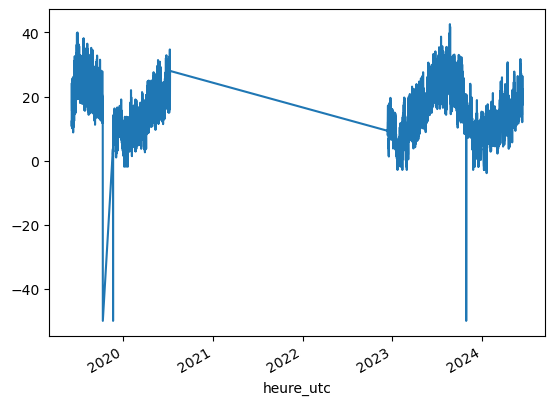

In [207]:
meteo2.temperature.plot()

In [209]:
meteo2.temperature.min(), meteo2.temperature.max()

(-50.0, 42.6)

In [212]:
meteo2.loc[
    meteo2.temperature.isna() | (meteo2.temperature < -49), 
    ['temperature','humidite']
]

,temperature,humidite
heure_utc,,
2019-10-10 13:45:00+00:00,-50.0,0
2019-10-10 14:00:00+00:00,-50.0,0
2019-10-10 14:15:00+00:00,-50.0,0
2019-10-10 14:30:00+00:00,-50.0,0
2019-10-10 14:45:00+00:00,-50.0,0
2019-10-10 15:00:00+00:00,-50.0,0
2019-10-10 15:15:00+00:00,-50.0,0
2019-10-10 15:30:00+00:00,-50.0,0
2019-10-10 15:45:00+00:00,-50.0,0


In [214]:
meteo2.loc['2021']

,data,id,humidite,direction_du_vecteur_de_vent_max,pluie_intensite_max,pression,direction_du_vecteur_vent_moyen,type_de_station,pluie,direction_du_vecteur_de_rafale_de_vent_max,force_moyenne_du_vecteur_vent,force_rafale_max,temperature,heure_de_paris
heure_utc,,,,,,,,,,,,,,


<Axes: xlabel='heure_utc'>

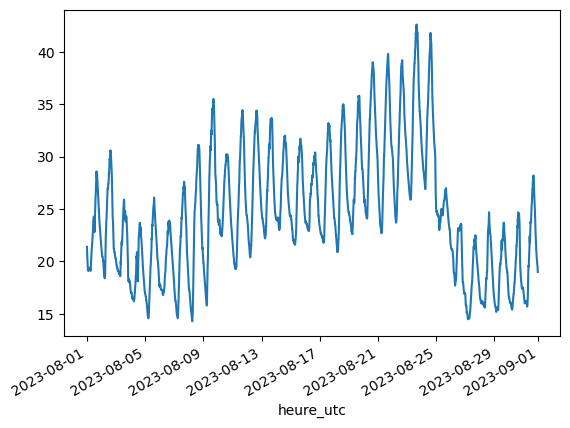

In [216]:
meteo2.loc["2023-08", 'temperature'].plot()

### Database

In [226]:
user = 'movie'
password = 'password'
host = 'localhost'
dbname = 'dbmovie'
port = 5432
url = f"postgresql://{user}:{password}@{host}:{port}/{dbname}"
enginepg = create_engine(url=url)

In [231]:
df_movies = pd.read_sql_table(con=enginepg, table_name='movie')
df_movies

,id,title,year,duration,synopsis,poster_uri,color,pg,director_id
0,5257,Excuse Me,1915,50.0,"Henry Mallory, U.S.A., receives orders to join...",https://m.media-amazon.com/images/M/MV5BMmVmMG...,None,R,767303
1,6366,Anton the Terrible,1916,50.0,"Presumably, the first woman ever to appear in ...",https://m.media-amazon.com/images/M/MV5BMWZiZj...,None,R,210352
2,8351,The Mysterious Mrs. Musslewhite,1917,50.0,"Raymond Van Seer, wealthy, has become morose a...",https://m.media-amazon.com/images/M/MV5BMTA0Nj...,None,R,916665
3,8384,On the Level,1917,50.0,"Merlin Warner, a sheep rancher's only child, e...",https://m.media-amazon.com/images/M/MV5BMTE5ZT...,None,R,577654
4,8642,The Sunset Trail,1917,50.0,Tomboy Bess Aiken grows up quickly when her mo...,https://m.media-amazon.com/images/M/MV5BYjk3OT...,None,R,577654
...,...,...,...,...,...,...,...,...,...
1182,7763324,Amazing Stories,1986,111.0,None,https://m.media-amazon.com/images/M/MV5BMGZkZj...,None,R,213100
1183,7816392,The Bouncer,2018,94.0,The hero independently raises his little daugh...,https://m.media-amazon.com/images/M/MV5BNzU3Mz...,None,R,2182866
1184,7903530,We Die Young,2019,92.0,None,https://m.media-amazon.com/images/M/MV5BZWRjYz...,None,R,1942069
1185,7959026,The Mule,2018,116.0,"Clint Eastwood stars as Earl Stone, a man who ...",https://m.media-amazon.com/images/M/MV5BMTc1OT...,None,R,142


In [232]:
sql="""select 
    m.title, 
    m.year,
    pl.role,
    p.name
from 
    movie m
    join play pl on pl.movie_id = m.id
    join person p on pl.actor_id = p.id
where 
    p.name = 'Clint Eastwood'
order by m.year desc
"""

In [234]:
filmo_clint = pd.read_sql_query(sql=sql, con=enginepg)
filmo_clint

,title,year,role,name
0,The Mule,2018,Earl Stone,Clint Eastwood
1,American Sniper,2014,Church Goer,Clint Eastwood
2,Trouble with the Curve,2012,Gus,Clint Eastwood
3,Gran Torino,2008,Walt Kowalski,Clint Eastwood
4,Million Dollar Baby,2004,Frankie Dunn,Clint Eastwood
...,...,...,...,...
57,Away All Boats,1956,Corpsman,Clint Eastwood
58,Lady Godiva of Coventry,1955,Alfred the Fletcher,Clint Eastwood
59,Tarantula,1955,Jet Squadron Leader,Clint Eastwood
60,Revenge of the Creature,1955,Jennings,Clint Eastwood
